In [23]:
import pandas as pd # for data manipulation
import numpy as np
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

import matplotlib.pyplot as plt

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
df = pd.read_csv('heart_2020_cleaned.csv')

print(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].head())

df['BMI'] = pd.qcut(df['BMI'], 6, duplicates='drop')
df['PhysicalHealth'] = pd.qcut(df['PhysicalHealth'], 15, duplicates='drop')
df['MentalHealth'] = pd.qcut(df['MentalHealth'], 12, duplicates='drop')
df['SleepTime'] = pd.qcut(df['SleepTime'], 12, duplicates='drop')

print(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].head())

     BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0
               BMI PhysicalHealth   MentalHealth     SleepTime
0  (12.019, 22.74]     (1.0, 3.0]   (17.0, 30.0]  (0.999, 5.0]
1  (12.019, 22.74]  (-0.001, 1.0]  (-0.001, 1.0]    (6.0, 7.0]
2   (25.09, 27.34]    (7.0, 25.0]   (17.0, 30.0]    (7.0, 8.0]
3   (22.74, 25.09]  (-0.001, 1.0]  (-0.001, 1.0]    (5.0, 6.0]
4   (22.74, 25.09]   (25.0, 30.0]  (-0.001, 1.0]    (7.0, 8.0]


In [25]:
y = df['HeartDisease']
x = df.drop('HeartDisease', axis=1)

print(x[['BMI','Smoking','AlcoholDrinking','Stroke']].head())

enc = LabelEncoder()
y = enc.fit_transform(y)

enc = OrdinalEncoder()
x = enc.fit_transform(x)

for i in range(5):
    print(x[i,[0,1,2,3]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

               BMI Smoking AlcoholDrinking Stroke
0  (12.019, 22.74]     Yes              No     No
1  (12.019, 22.74]      No              No    Yes
2   (25.09, 27.34]     Yes              No     No
3   (22.74, 25.09]      No              No     No
4   (22.74, 25.09]      No              No     No
[0. 1. 0. 0.]
[0. 0. 0. 1.]
[2. 1. 0. 0.]
[1. 0. 0. 0.]
[1. 0. 0. 0.]


Model:  CategoricalNB()
Classification Report:

               precision    recall  f1-score   support

          No       0.94      0.92      0.93     43904
         Yes       0.32      0.41      0.36      4066

    accuracy                           0.88     47970
   macro avg       0.63      0.67      0.65     47970
weighted avg       0.89      0.88      0.88     47970



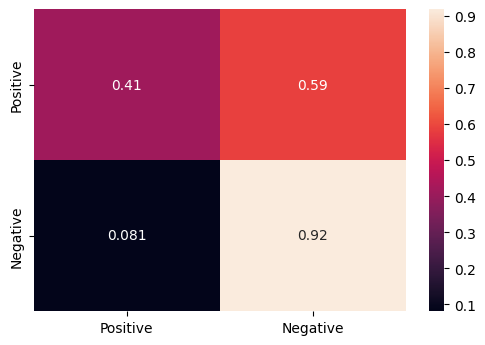

In [26]:
model = CategoricalNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names=['No','Yes'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['No','Yes']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/categorical.png', bbox_inches='tight')
plt.show()


Model:  DecisionTreeClassifier()
Classification Report:

               precision    recall  f1-score   support

          No       0.93      0.94      0.93     43904
         Yes       0.26      0.23      0.24      4066

    accuracy                           0.88     47970
   macro avg       0.59      0.58      0.59     47970
weighted avg       0.87      0.88      0.88     47970



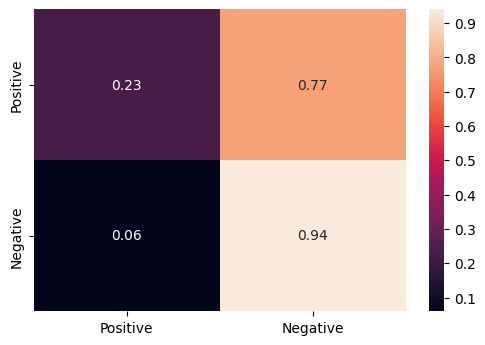

In [27]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names=['No','Yes'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['No','Yes']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/categorical.png', bbox_inches='tight')
plt.show()


In [29]:
model = KNeighborsClassifier(3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, target_names=['No','Yes'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['No','Yes']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/categorical.png', bbox_inches='tight')
plt.show()
